# KMeans Clustering

Categorizing the tracks based on their musical features. The goal is to assign tracks a label to use categories in the model process, to reduce the amount of features and dimensionality. 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
tracks = pd.read_csv('../data/track_features/tf_mini.csv')

In [3]:
tracks.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [5]:
acoustic_col = ['acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7']
features = tracks[acoustic_col]

In [6]:
acoustic_col_2 = ['acousticness', 'beat_strength', 'bounciness', 'danceability', 'energy', 'flatness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
features2 = tracks[acoustic_col_2]

In [7]:
acoustic_col_3 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'tempo', 'valence']
features3 = tracks[acoustic_col_3]

In [8]:
acoustic_col_4 = ['acousticness','beat_strength','danceability',
                        'dyn_range_mean', 'energy', 'flatness','instrumentalness', 'liveness', 
                        'loudness', 'mechanism', 'organism','speechiness','valence',
                        'acoustic_vector_0','acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
                        'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6','acoustic_vector_7']
features4 = tracks[acoustic_col_4]

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   acoustic_vector_0  50704 non-null  float64
 1   acoustic_vector_1  50704 non-null  float64
 2   acoustic_vector_2  50704 non-null  float64
 3   acoustic_vector_3  50704 non-null  float64
 4   acoustic_vector_4  50704 non-null  float64
 5   acoustic_vector_5  50704 non-null  float64
 6   acoustic_vector_6  50704 non-null  float64
 7   acoustic_vector_7  50704 non-null  float64
dtypes: float64(8)
memory usage: 3.1 MB


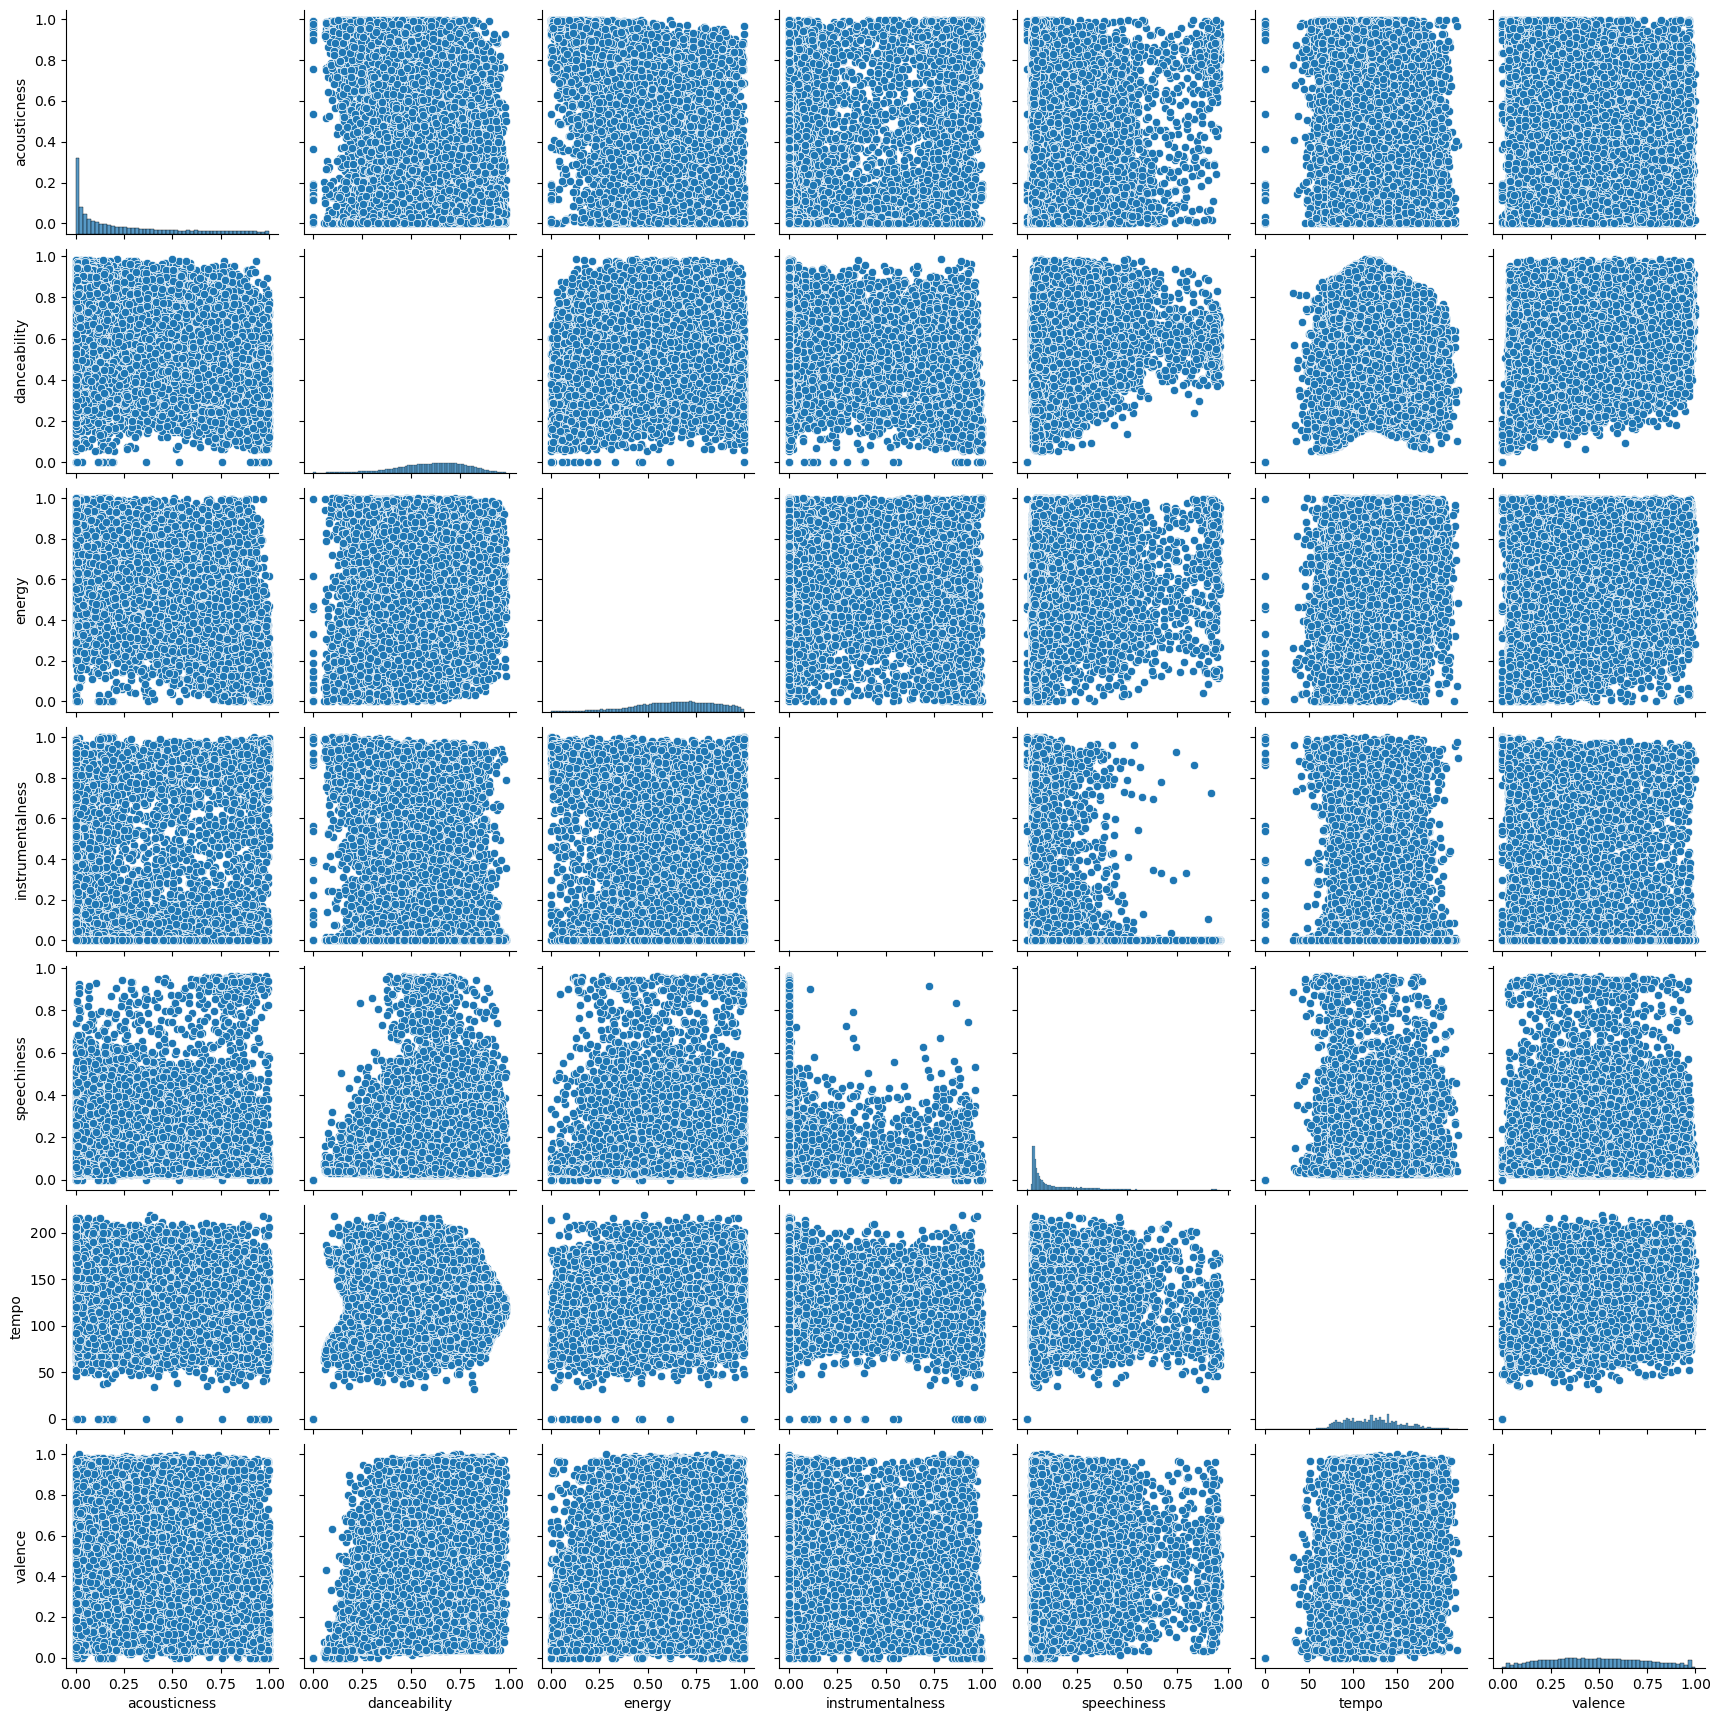

In [10]:
sns.pairplot(features3)

In [11]:
scaler = StandardScaler()

In [12]:
features_scaled = scaler.fit_transform(features)

In [13]:
features_2_scaled = scaler.fit_transform(features2)

In [14]:
features_3_scaled = scaler.fit_transform(features3)

In [15]:
features_4_scaled = scaler.fit_transform(features4)

I ran this funtion with all four options above, that contain various combinations of the musical features. 

In [16]:
def test_n_for_clustering(n, data):
    
    cluster = KMeans(n_clusters=n)
    
    cluster.fit(data)

    print(silhouette_score(data, cluster.labels_))
    
    return cluster.labels_

In [17]:
for num in range (2, 10):
    test_n_for_clustering(num, features_4_scaled)

0.18978980416717736
0.19027453900539693
0.2064445886154863
0.2119285565396154
0.17800345233870266
0.1650598357735142
0.16474306487061507
0.16531868548164447


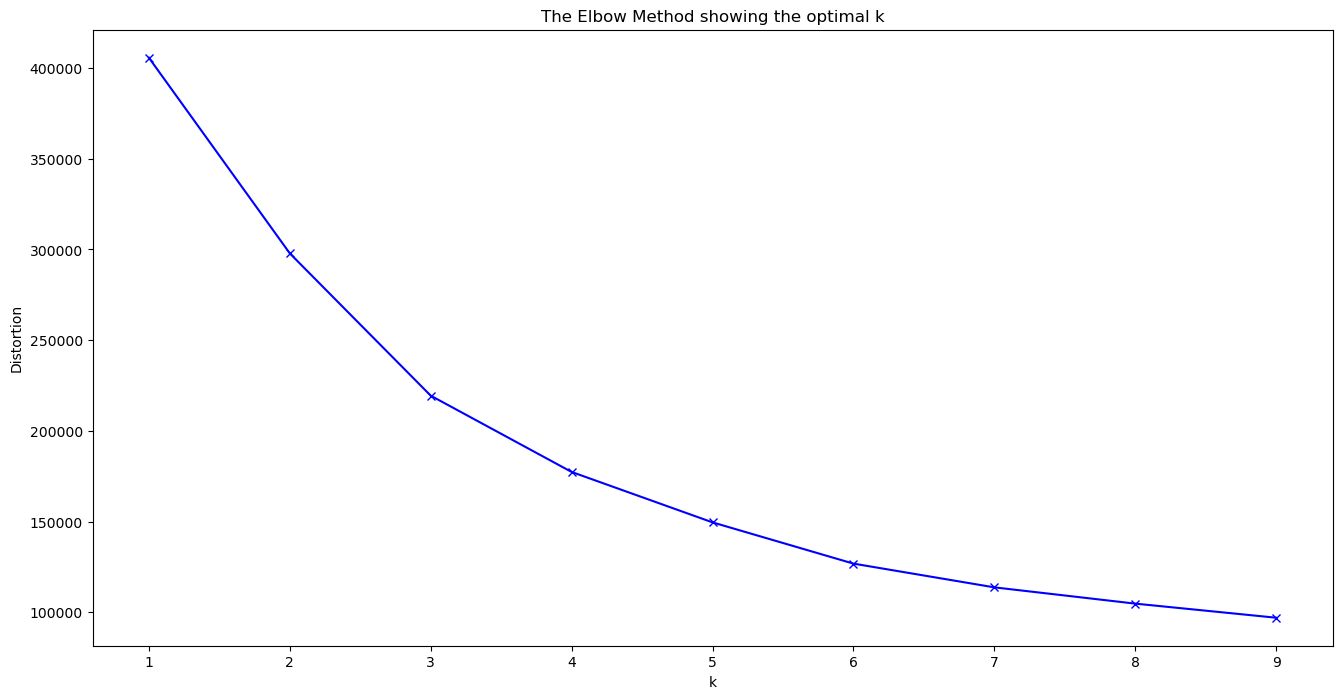

In [18]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features_scaled)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
cluster = KMeans(n_clusters=6)

In [20]:
cluster.fit(features_scaled)

KMeans(n_clusters=6)

In [21]:
track_pred = cluster.predict(features_scaled).tolist()

In [22]:
tracks['acoustic_predict'] = track_pred

In [23]:
tracks['acoustic_predict'].value_counts()

2    17093
5     9812
0     9367
1     6549
3     4750
4     3133
Name: acoustic_predict, dtype: int64

In [24]:
tracks.groupby('acoustic_predict')

In [25]:
tracks = tracks.drop(labels=acoustic_col, axis=1)

In [26]:
tracks

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_predict
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,4
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,4
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,4
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,4
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,184.686798,2018,99.315966,0.584765,0.521544,0.515087,0.653140,7.684220,0.336433,...,0.102380,-10.820,0.597561,major,0.501950,0.037479,92.927002,4,0.542063,5
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,251.813324,2018,99.918573,0.406680,0.565200,0.693126,0.844861,11.176841,0.709085,...,0.110893,-5.966,0.583710,major,0.411513,0.317291,124.168999,4,0.472353,5
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,157.520004,2018,98.517692,0.001279,0.414721,0.341769,0.463543,5.405471,0.975503,...,0.320818,-3.044,0.393162,major,0.429100,0.061294,107.156998,4,0.766519,1
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,...,0.105345,-5.334,0.796875,minor,0.174222,0.069366,134.067993,4,0.058505,2


In [27]:
#tracks.to_csv('clustered_tracks.csv')